# EE4375 Usage of Julia 

This notebook provides information on using [Julia](www.julialang.org) in the EE4375 course. 

## Section 1: The Julia Programming Language   

### Why Julia
1. [Julia Compare to Other Languages](https://docs.julialang.org/en/v1/);
2. [Why Julia - A manifesto](https://github.com/Datseris/whyjulia-manifesto) by Datseris;
3. [A reflection on NumPy](https://dynomight.net/numpy/) 

###  Introductory Books 
1. [ThinkJulia](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html) by Ben Lauwnens and Allen Downey: Quote <i> This book is for anyone who wants to learn to program. No formal prior knowledge is required. </i>
1. [Practical Julia - A Hands-On Introduction for Scientific Minds](https://amzn.in/iAZvOb3) on Amazon with free preview by Lee Phillips
1. [Appendix G entitled Julia](https://algorithmsbook.com/files/appendix-g.pdf) of the book <i>Algorithms for Optimization</i> by Mykel Kochenderfer and Tim Wheeler; 
1. [Matlab-Python-Julia Cheatsheet](https://codeberg.org/AdamWysokinski/BBJ/src/branch/main/MPJ.md) by Adam Wysokinski; 
1. [Introducing Julia](https://en.wikibooks.org/wiki/Introducing_Julia) Quote <i> This wikibook is intended as an introduction to the language for the less experienced and occasional programmer.</i>
1. [Julia Data Science](https://juliadatascience.io/) by Jose Storopoli and Rik Huijzer and Lazaro Alonso: Quote <i> This is an open source and open access book on how to do Data Science using Julia. </i> Chapter 2 and Chapter 3 of the book provide an introduction into Julia;
1. [Fundamentals of Numerical Computation](https://tobydriscoll.net/fnc-julia/frontmatter.html) by Tobin Driscoll and Richard Braun. Quote: <i> Julia was designed from its inception to prioritize numerical scientific computing. </i> This book provides background on the linear algebra, calculus and differential equations used in this course. Contains various code examples. 
1. Other books are available at [julialang learning](https://julialang.org/learning/books) 

###  Introductory  Videos Series  
1. [Introductory Video Series](www.youtube.com) by Doggo dot jl on youtube; 
1. [Zero2Hero-JuliaWorkshop](https://github.com/Datseris/Zero2Hero-JuliaWorkshop/tree/main) short workshop; 
1. [julialang learning notebooks](https://julialang.org/learning/notebooks/) video tutorial; 

### Online Sources  and Course Material
1. [Zero2Hero-JuliaWorkshop](https://github.com/Datseris/Zero2Hero-JuliaWorkshop/tree/main)
1. [JuliaNotes](https://m3g.github.io/JuliaNotes.jl/stable/)
1. [Modern Julia Workflows](https://modernjuliaworkflows.github.io/) 
1. [Gens Julia](https://gensjulia.pages.dev)
1. [JuliaDelft24 by Carsten Bauer](https://github.com/carstenbauer/JuliaDelft24/)

### Papers 
1. [Julia: A Fresh Approach to Numerical Computing](https://arxiv.org/abs/1411.1607) by Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral B. Shah; 

### Code Design 

1. [Hands on design patterns and best practices with Julia](https://www.perlego.com/book/1365831/handson-design-patterns-and-best-practices-with-julia-proven-solutions-to-common-problems-in-software-design-for-julia-1x-pdf?utm_source=google&utm_medium=cpc&campaignid=15913700346&adgroupid=133123169675&gclid=CjwKCAjwpqCZBhAbEiwAa7pXeYKebELCtsQ6SqNEzJ9OASEoO4lkr5P5QyjKIARICrnFYKq_QQ2yOBoCh14QAvD_BwE) by Tom Kwong. 

## Section 2: Multiple Dispatch in Julia 

In this section we discuss various Julia programming language constructions that will be valuable in the course.   

### Multiple Dispatch 

A key concept in the design and performance of Julia is the concept of multiple dispatch. In our discussion we will follow examples and ideas from the inspiring video [The Unreasonable Effectedness of Multiple Dispatch” by Stefan Karpinski](https://www.youtube.com/watch?v=kc9HwsxE1OY) (this video also provides a good introduction into abstract type, subtype definition, generic code and generic types). Other examples are given in [Chapter 17 of Thinking Julia](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#chap17) and [Section 4 of Julia: A Fresh Approach to Numerical Computing](https://arxiv.org/abs/1411.1607). More information on how multiple dispatch works in Julia is provided in [section Methods in the Julia manual](https://docs.julialang.org/en/v1/manual/methods/). More background information on multiple dispatch is provided in the [wiki on multiple dispath](https://en.wikipedia.org/wiki/Multiple_dispatch). 

<b> The type system in Julia </b>

Julia is a typed language. This implies that Julia implements various types to store e.g. integers, floats and strings. The function <i>typeof</i> returns the type of a variable. Julia implements a hierarchy (in the form of tree structure) of types. The functions <i>subtypes</i> (with final-s) and <i>supertype</i> (without final-s) return the various sub (or derived) types and the super (or parent) type of a given type. The type hierarchy allows to implement multiple dispatch (binding a function to its most specific type of input). This feature is a key feature in the performance of Julia for scientific computing.  

<b> User Defined Types </b>

Julia allows the user to defined its own type. A container with elementary data types is build. This allows to register a person in a database with name, adres and phone number. More mathematicallly, a point can be coded with its spatial coordinates, a triangle with its edges and a finite element mesh with its elements. 

In the code example that follows, first an abstract data type Pet is defined. Next, the two subtypes Dog and Cat are defined as a struct with a field Name. Next, the variable rex of type Dog and the variables whiskers of type Cat are defined. One can verify here the functioning of the functions <i>subtypes</i>, <i>supertype</i> and <i>typeof</i>. 

In [1]:
abstract type Pet end
struct Dog<:Pet name::String end
struct Cat<:Pet name::String end
rex = Dog("Rex")
whiskers = Cat("Whiskers")

Cat("Whiskers")

<b> Single dynamic dispatch </b>

Julia perform a dispatch of the type of an argument when calling a function. This is shown in the following example. Observe the type annotation in defining the functions. 

In [2]:
identify(a::Dog) = "I am a Dog"
identify(a::Cat) = "I am a Cat"
identify(whiskers)

"I am a Cat"

The function <i>methods</i> returns the methods table of a function.

In [3]:
methods(identify)

# 2 methods for generic function "identify" from Main:
 [1] identify(a::Dog)
     @ In[2]:1
 [2] identify(a::Cat)
     @ In[2]:2

<b> Multiple dynamic dispatch </b>

Julia performs a dispatch on the type of a arguments in the function call. 

In [4]:
function encounter(a::Pet, b::Pet)
    verb = meet(a,b) 
    println(" $(a.name) meets $(b.name) and $verb")
end 
meet(a::Dog, b::Dog) = "sniffs"
meet(a::Dog, b::Cat) = "chases"
meet(a::Cat, b::Dog) = "hisses"
meet(a::Cat, b::Cat) = "slinks"

meet (generic function with 4 methods)

In [5]:
encounter(rex, whiskers)

 Rex meets Whiskers and chases


In [6]:
methods(meet)

# 4 methods for generic function "meet" from Main:
 [1] meet(a::Dog, b::Dog)
     @ In[4]:5
 [2] meet(a::Dog, b::Cat)
     @ In[4]:6
 [3] meet(a::Cat, b::Dog)
     @ In[4]:7
 [4] meet(a::Cat, b::Cat)
     @ In[4]:8

<b> Another Example of Multiple Dispatch </b>

Another small example of multiple dispatch (including how to add methods to methods from the base library) is given in [the fall-in-love-with-julia course](https://github.com/jolin-io/fall-in-love-with-julia/blob/main/01%20introduction%20-%2002%20matrix%20reusability.ipynb). 

Another example of multiple dispatch is given in [Dispatch in Java and Julia](https://discourse.julialang.org/t/advantages-of-julia-vs-mojo/111614/24).

<b>User-Defined Types by Subtyping AbstractArray</b>

See manual example of [SquaresVector](https://docs.julialang.org/en/v1/manual/interfaces/#man-interface-array) in the manual. The use of <: is further explained [Confused by Type Discourse post](https://docs.julialang.org/en/v1/manual/interfaces/#man-interface-array). 

## Section 3: Tuple, Array, Vectors, Matrices and Transpose

<b>Tuple</b>

<b>Array</b> Definition of array of arbitrary type; 

<b>Vector</b> Alias for <i>Array{T,1}</i>. Given a column vector with $N$ elements, the function <i>size</i> returns the length-one tuple (1,). A length-one [tuple](https://docs.julialang.org/en/v1/base/base/#Core.Tuple) must be written with a comma;    

<b>Matrix</b> Alias for <i>Array{T,2}</i>. Given a row vector with $N$ elements, the function <i>size</i> return the lengths the tuple of length 2 (1,$N$); 

<b>Transpose</b> The return type of the function <i>Transpose</i> has particular annotation; 

## Section 4: Other Concepts in Julia

<b> Type stability, static arrays and mutuable arrays </b>
This examples was discussed on the Discourse forum at [Adjoint(A)*A for MArray and Type Stability](https://discourse.julialang.org/t/adjoint-a-a-for-marray-and-type-stability/118201/6) (merits a revisit). The purpose of discussing this examples here is illustrate once again the multiple dispatch using type annotations. The example here is more complex as it involves concrete types using structs parametrized by type to ensure type stability. 

In [7]:
using StaticArrays

# define type struct with static (S) arrays as a field 
struct SFoo{T}
  SGnu::SMatrix{3,3,T,9}
end 

# define type struct with mutable (M) array as a field
struct MFoo{T}
  MGnu::MMatrix{3,3,T,9}
end 

In [8]:
# declare variable of type SFoo holding a static array 
sgnu = SMatrix{3,3}(0., 0., 0., 0., 0., 0., 0., 0., 0.)
sfoo = SFoo(sgnu)

# declare variable of type MFoo holding a static array
mgnu = MMatrix{3,3}(0., 0., 0., 0., 0., 0., 0., 0., 0.)
mfoo = MFoo(mgnu)

MFoo{Float64}([0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0])

Note the difference between adjoint (defined in the standard library) and Adjoint (defined by LinearAlgebra as lazy wrapper for the adjoint view). 

In [9]:
# define function that compute A^H*A for A static array. 
function bar(sfoo::SFoo)
    sgnu = sfoo.SGnu 
    return adjoint(sgnu)*sgnu 
end 

# define function that compute A^H*A for A multable array. 
function bar(mfoo::MFoo)
    mgnu = mfoo.MGnu 
    return adjoint(mgnu)*mgnu 
end

bar (generic function with 2 methods)

In [10]:
methods(bar)

# 2 methods for generic function "bar" from Main:
 [1] bar(sfoo::SFoo)
     @ In[9]:2
 [2] bar(mfoo::MFoo)
     @ In[9]:8

In [11]:
@code_warntype bar(sfoo)
@code_warntype bar(mfoo)

MethodInstance for bar(::SFoo{Float64})
  from bar(sfoo::SFoo) @ Main In[9]:2
Arguments
  #self#::Core.Const(bar)
  sfoo::SFoo{Float64}
Locals
  sgnu::SMatrix{3, 3, Float64, 9}
Body::SMatrix{3, 3, Float64, 9}
1 ─      (sgnu = Base.getproperty(sfoo, :SGnu))
│   %2 = Main.adjoint(sgnu)::SMatrix{3, 3, Float64, 9}
│   %3 = (%2 * sgnu)::SMatrix{3, 3, Float64, 9}
└──      return %3

MethodInstance for bar(::MFoo{Float64})
  from bar(mfoo::MFoo) @ Main In[9]:8
Arguments
  #self#::Core.Const(bar)
  mfoo::MFoo{Float64}
Locals
  mgnu::MMatrix{3, 3, Float64, 9}
Body::MMatrix{3, 3, Float64, 9}
1 ─      (mgnu = Base.getproperty(mfoo, :MGnu))
│   %2 = Main.adjoint(mgnu)::MMatrix{3, 3, Float64, 9}
│   %3 = (%2 * mgnu)::MMatrix{3, 3, Float64, 9}
└──      return %3



<b>Use of the macro view @view</b>
The macro @view allows to split a vector into subvectors. (This will be useful in defining e.g. the right-hand side function of ordinary differential equations).  

In [12]:
# use of the macro @view 
m = [1;2;3;4]
m1 = @view m[1:2]
m2 = @view m[3:4]
m2[1]

3

<b>Notes on using broadcast</b> 
1. broadcast over 2D (and higher) arrays takes proper memory layout into account; 
1. using Ref to avoid broadcast over the second argument. 

In [13]:
x = [10., 20.]
p = [1.,2.,3.]

foo(x,p) = sum(x*p)

# below results in a dimension mismatch 
#foo.(x,p)

foo.(x,Ref(p))

2-element Vector{Float64}:
  60.0
 120.0

<b>Note on using broadcast</b> Broadcast on two vectors to obtain a matrix. See [this Discourse post](https://discourse.julialang.org/t/lambdify-function-to-matrix/123163). 

<b>Use of the functions map and mapreduce</b>

In [14]:
using StaticArrays

# a point in 3D is a tuple of 3 coordinates 
# we here introduce static vectors that appear to be vital to reduce the number of allocations 
const Point3D = SVector{3,Float64};

# use the function mapreduce() to 2D array of 3D-vectors
A = Array{Point3D}(undef,2,2)
A[1,1] = Point3D(-1.,0.,0.)  
A[1,2] = Point3D(-2.,0.,0.)
A[2,1] = Point3D(-1.,0.,0.)  
A[2,2] = Point3D(-2.,0.,0.)
A

map(x->2*x,A)

mapreduce(x->2*x,+,A)

3-element SVector{3, Float64} with indices SOneTo(3):
 -12.0
   0.0
   0.0

<b>StaticArrays</b>: Size is coded as part of the type information. 

<b> Type instability and Performance </b>
1. type stability is an important concept in the computational efficiency of the code. See section on [Type Instability in JuliaNotes](https://m3g.github.io/JuliaNotes.jl/stable/instability/);
2. the for-loop returns a Union, causng the macro @code_warntype to give a harmless warning. See [discourse post](https://discourse.julialang.org/t/code-warntype-gives-yellow-union-nothing-tuple-int64-int64-in-for-loops/52814);

Applications of multiple dispatch in coding of FEM:
1. FEM assembly (methods used depend on the type of argument);
2. FEM solve (method used to solve linear system depends on the type of matrix and right-side vector).

<b>Modifying in place</b>: Example of function that modifies in place. 

In [15]:
using BenchmarkTools

In [16]:
function foo!(y,x)
    # notice the dot to denote elementwise assignment
    y .= sum(x)
    return y
end 

x1 = ones(10); y1 = [0.,0.];

In [17]:
# Use the symbol $ to interpolate global variables when benchmarking to avoid spurious allocations
@btime foo!($y1,$x1)

  5.417 ns (0 allocations: 0 bytes)


2-element Vector{Float64}:
 10.0
 10.0

### Using Modules 
More later. 
<img src="jl_using_module.png" width="400mm">

### Overloading Methods from Base 
More later. 

### Evaluation of Julia code 
See [eval in Julia documentation](https://docs.julialang.org/en/v1/devdocs/eval/). 

### Function-like Objects and Callable Structs  

We discussed the need to encapsulate (or to group) user data in a container before when discussing user defined types. Often it is valuable to store a function that operates on the data in the same container. An example is a container that stores the coefficients of a polynomial and a function that evaluates the polynomial in a given input.  

See heading Function like objects in [section Methods in the Julia manual](https://docs.julialang.org/en/v1/manual/methods/); struct (data) with a method (function) associated to it; example of polynomial; ask students to read through the documentation, give an example from documentartion and give own example; 

### Eager vs. Lazy Evaluation

A lazily-evaluated list is a list whose elements are not evaluated when it's constructed, but rather when it is accessed.
The benefit of lazy operations is that they can be materialized in-place, possible using simplifications. For example, allows to implement BLAS-1 in place operations. Allows allocation free population of vectors using heat, vcat and copy! 
Examples from https://github.com/MikeInnes/Lazy.jl or https://github.com/JuliaArrays/LazyArrays.jl 

Application to FEM: list of elementary matrices and vectors as lazy arrays; 


Application to FEM: FEM assembly process; 

### Linear Solvers 
[what-is-a-recommended-way-to-solve-a-linear-equation](https://discourse.julialang.org/t/what-is-a-recommended-way-to-solve-a-linear-equation/128420) 

### DifferentialEquations.jl 

Avoid allocations in the right-hand side function [this discourse post](https://discourse.julialang.org/t/recommendation-to-solve-linear-systems-with-very-large-positive-definite-symmetric-sparse-matrix-10-6-x-10-6/122603/4); 

### Automatic Differentiation

See [zygote](https://fluxml.ai/Zygote.jl/latest/) and [enzyme](https://enzyme.mit.edu/julia/); 

Application to FEM: modeling magnetic saturation (non-linear BH curve, non-linear constitutive equation). Non-linear assembly. Non-linar solve. (see examples of non-linear solve in e.g. Gridap.jl and Ferrite.jl)  

### Parallel and GPU Computing

<b> Shared Memory </b>

Using macro @parallel and SharedArray. See e.g. Section 5.4 of Fresh Approach paper. 

<b> Distributed Memory</b>

Application to FEM: (1/2): parallel assembly and solve of the FEM matrix and right-hand vector by a parallel loop over the elements. Distribution of the elements over the processors. Use of parallel distributed matrices and vectors (layout of submatrices and subvectors connected by interfaces). (2/2) Parallel solve using iterative solution methods. 

### Julia Environment Variables 

Use ENV or ENV["HOME"] e.g.  

### Package Management
1. Pkg.status("PackageName") for version of package being used; 
2. Pkg.update("PackageName") to update a package 

## Section 5: Post Processing using Plots  
To visualize mesh and computed results, use either 
1. use Makie.jl (preferred); 
2. WriteVTK.jl and visualize results using Paraview; 

In [1]:
using Plots

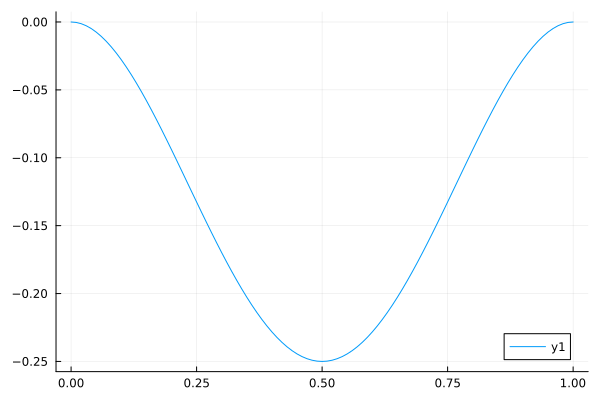

In [2]:
# sample 1D post-processing 
# here we avoid storing x as a vector, resulting in memory savings - use varinfo() to check memory savings
myf(x) = x*(x-1)*sin(pi*x)
x = 0:1/100:1
plot(x,myf.(x))

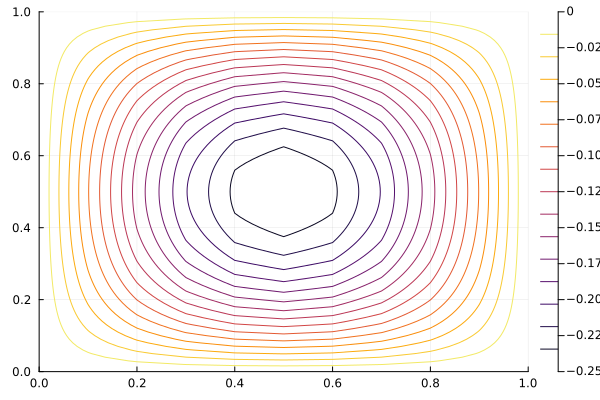

In [3]:
# sample 2D post-processing 
# here we avoid storing x as a vector, resulting in memory savings - use varinfo() to check memory savings
myf(x,y) = x*(x-1)*sin(pi*y)
x = 0:1/100:1; y = 0:1/10:1 
contour(y,x,myf.(x,y')) # observe y to be the first argumenbt and observe the use of transpose 

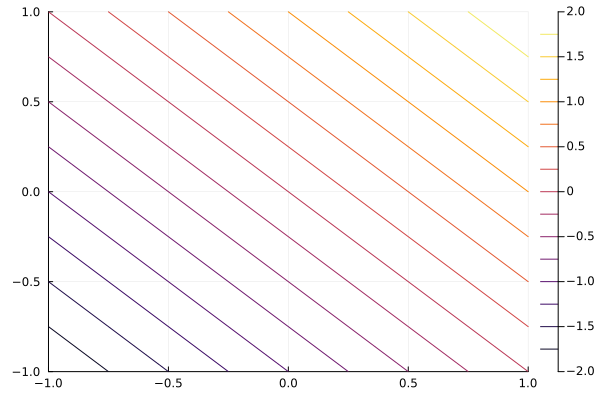

In [7]:
myf(x,y) = x+y
x = -1:1/100:1; y = -1:1/10:1 
contour(y,x,myf.(x,y')) # observe y to be the first argumenbt and observe the use of transpose

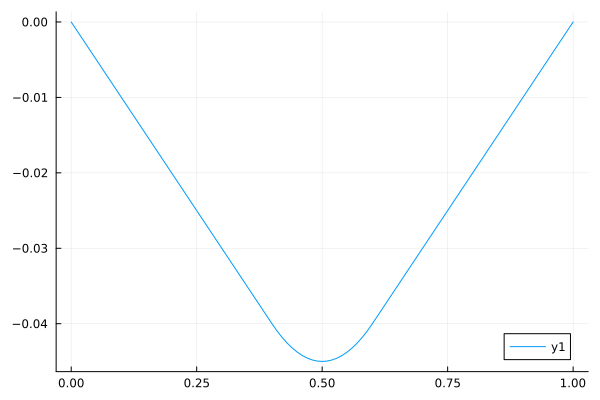

In [16]:
x1 = 0.4
x2 = 0.6
C = .5*x2^2-x2-.5*x1^2 
D = .5*x1^2
A = x1+C
E = x2+C
xvec = 0.:0.01:1.
myf(x) = A*x*(x<=x1)+(.5*x^2+C*x+D)*(x>x1)*(x<x2)+E*(x-1)*(x>=x2)
fvec = myf.(xvec)
plot(xvec,fvec)